In [50]:
import pandas as pd
import numpy as np
from numpy import set_printoptions
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

**Delivery Time**

In [51]:
dtime=pd.read_csv("https://raw.githubusercontent.com/sfarhan7/datasets/main/python%20datasets/csv/delivery%20time.csv")
dtime.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [52]:
dtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [53]:
dtime.shape

(21, 2)

In [54]:
dtime.shape[1]

2

In [55]:
dtime.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [56]:
dtime.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<Axes: >

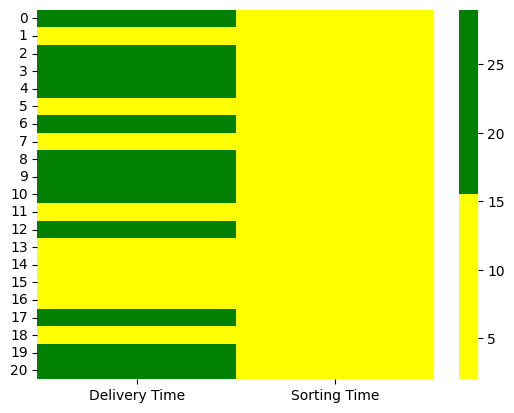

In [57]:
colour=["yellow","green"]
sns.heatmap(dtime,cmap=sns.color_palette(colour))

<Axes: >

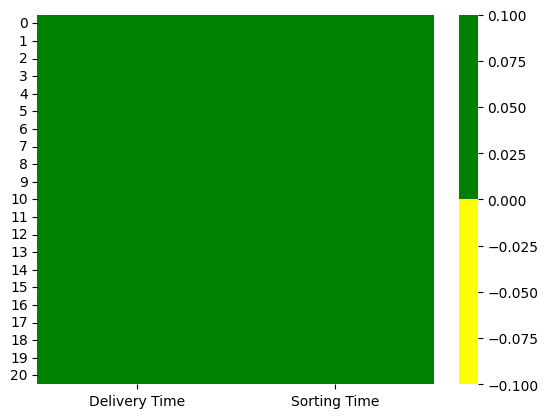

In [58]:
cols=dtime.columns
colour=["yellow","green"]
sns.heatmap(dtime[cols].isnull(),cmap=sns.color_palette(colour))

In [59]:
dtime.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

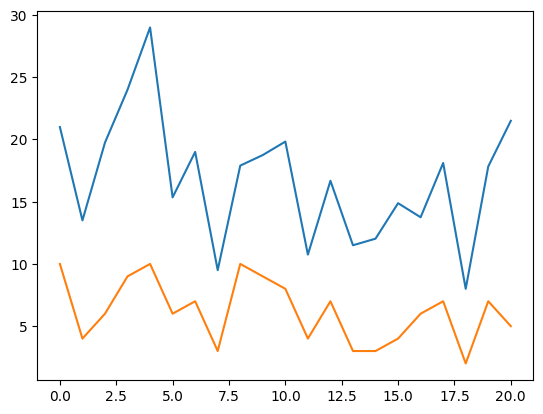

In [60]:
plt.plot(dtime)

In [61]:
dtime.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

<ipython-input-62-3bbdd04fe75d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtime["Delivery Time"])


<Axes: xlabel='Delivery Time', ylabel='Density'>

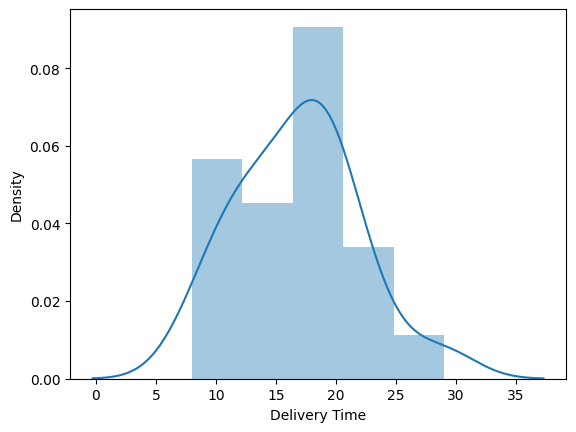

In [62]:
sns.distplot(dtime["Delivery Time"])

<ipython-input-63-43b7ed64db37>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtime["Sorting Time"])


<Axes: xlabel='Sorting Time', ylabel='Density'>

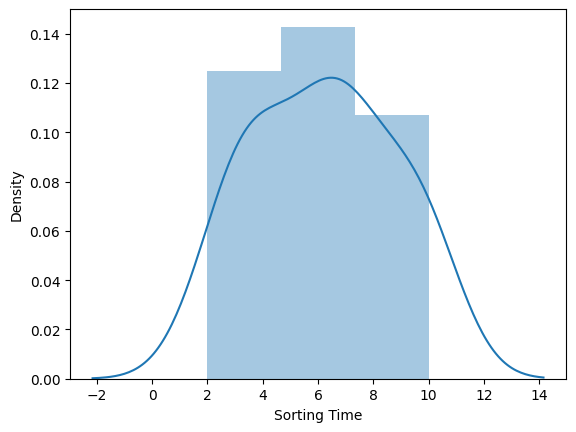

In [63]:
sns.distplot(dtime["Sorting Time"])

In [64]:
dtime2=dtime.rename({"Delivery Time":"delivery_time","Sorting Time":"sort_time"},axis=1)
dtime2

,delivery_time,sort_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [65]:
dtime2.corr()

,delivery_time,sort_time
delivery_time,1.000000,0.825997
sort_time,0.825997,1.000000


In [66]:
array=dtime.values
scalerm=MinMaxScaler(feature_range=(0,1))
rescaledX=scalerm.fit_transform(array)
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.62 1.  ]
 [0.26 0.25]
 [0.56 0.5 ]
 [0.76 0.88]
 [1.   1.  ]]


In [67]:
scalers=StandardScaler()
scalers.fit(array)
reX=scalers.transform(array)
print(reX)

[[ 0.85  1.54]
 [-0.66 -0.88]
 [ 0.6  -0.08]
 [ 1.46  1.13]
 [ 2.47  1.54]
 [-0.29 -0.08]
 [ 0.45  0.33]
 [-1.47 -1.29]
 [ 0.22  1.54]
 [ 0.4   1.13]
 [ 0.61  0.73]
 [-1.22 -0.88]
 [-0.02  0.33]
 [-1.07 -1.29]
 [-0.96 -1.29]
 [-0.39 -0.88]
 [-0.61 -0.08]
 [ 0.27  0.33]
 [-1.78 -1.69]
 [ 0.21  0.33]
 [ 0.95 -0.48]]


In [68]:
modelds=smf.ols("delivery_time~sort_time",data=dtime2).fit()

In [69]:
modelds.params

Intercept    6.582734
sort_time    1.649020
dtype: float64

In [70]:
modelds.tvalues,modelds.pvalues

(Intercept    3.823349
 sort_time    6.387447
 dtype: float64,
 Intercept    0.001147
 sort_time    0.000004
 dtype: float64)

In [71]:
modelds.rsquared,modelds.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [72]:
d_time=(6.582734)+(1.649020)*5 #manual prediction for sorting time 5
d_time

14.827834

In [73]:
timed=pd.Series([5,8,10]) #automatic prediction for sorting time 5,8,10
timed

0     5
1     8
2    10
dtype: int64

In [74]:
timed_pred=pd.DataFrame(timed,columns=["sort_time"])
timed_pred

,sort_time
0,5
1,8
2,10


In [75]:
modelds.predict(timed_pred)

0    14.827833
1    19.774893
2    23.072933
dtype: float64

**Salary Data**

In [76]:
sdata=pd.read_csv("https://raw.githubusercontent.com/sfarhan7/datasets/main/python%20datasets/csv/salary%20data.csv")
sdata.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [77]:
sdata.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [78]:
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [79]:
sdata.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

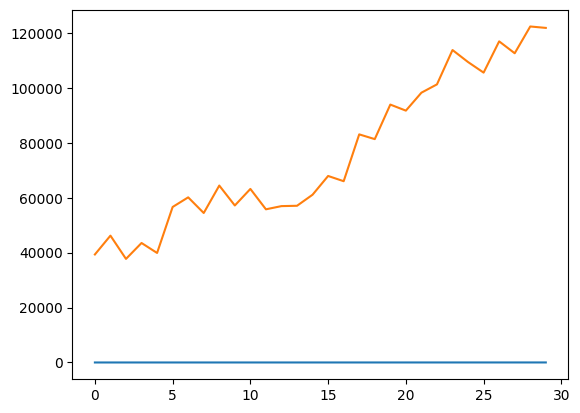

In [80]:
plt.plot(sdata)

<ipython-input-81-329746583f2d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sdata.YearsExperience)


<Axes: xlabel='YearsExperience', ylabel='Density'>

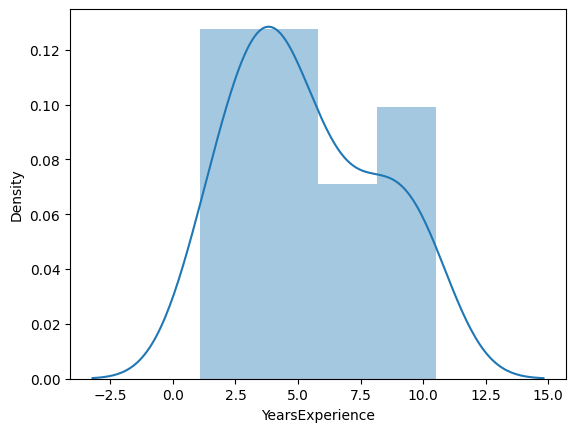

In [81]:
sns.distplot(sdata.YearsExperience)

<ipython-input-82-3f6b0878c11f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sdata.Salary)


<Axes: xlabel='Salary', ylabel='Density'>

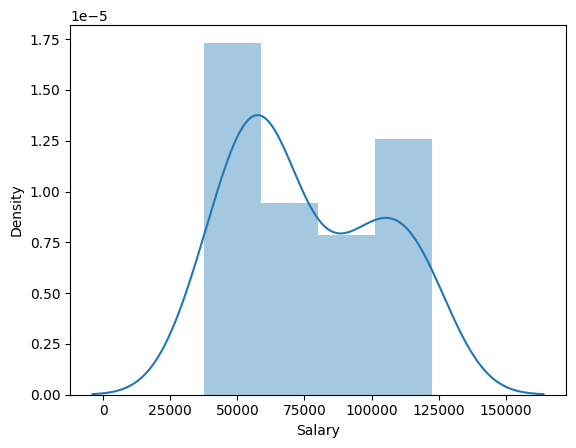

In [82]:
sns.distplot(sdata.Salary)

In [83]:
sdata2=sdata.rename({"YearsExperience":"yrs_exp","Salary":"salary"},axis=1)
sdata2.head()

,yrs_exp,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [84]:
sdata2.corr()

,yrs_exp,salary
yrs_exp,1.000000,0.978242
salary,0.978242,1.000000


In [85]:
modelY=smf.ols("salary~yrs_exp",data=sdata2).fit()

In [86]:
modelY.params

Intercept    25792.200199
yrs_exp       9449.962321
dtype: float64

In [87]:
modelY.tvalues, modelY.pvalues

(Intercept    11.346940
 yrs_exp      24.950094
 dtype: float64,
 Intercept    5.511950e-12
 yrs_exp      1.143068e-20
 dtype: float64)

In [88]:
modelY.rsquared, modelY.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [89]:
modele=(25792.200199)-(9449.962321)*5 #manual prediction for 5 Yrs of Exp.
modele

-21457.611406000004

In [90]:
models=pd.Series([4,6,9]) #automatic pred. for exp. of 4,6,9
models

0    4
1    6
2    9
dtype: int64

In [91]:
models_pred=pd.DataFrame(models,columns=["yrs_exp"])
models_pred

,yrs_exp
0,4
1,6
2,9


In [92]:
modelY.predict(models_pred)

0     63592.049484
1     82491.974127
2    110841.861092
dtype: float64

In [93]:
ary=sdata.values
scalem=MinMaxScaler()
re=scalem.fit_transform(ary)
set_printoptions()
print(re)

[[0.   0.02]
 [0.02 0.1 ]
 [0.04 0.  ]
 [0.1  0.07]
 [0.12 0.03]
 [0.19 0.22]
 [0.2  0.26]
 [0.22 0.2 ]
 [0.22 0.32]
 [0.28 0.23]
 [0.3  0.3 ]
 [0.31 0.21]
 [0.31 0.23]
 [0.32 0.23]
 [0.36 0.28]
 [0.4  0.36]
 [0.43 0.33]
 [0.45 0.54]
 [0.51 0.52]
 [0.52 0.66]
 [0.61 0.64]
 [0.64 0.72]
 [0.72 0.75]
 [0.76 0.9 ]
 [0.81 0.85]
 [0.84 0.8 ]
 [0.89 0.94]
 [0.9  0.88]
 [0.98 1.  ]
 [1.   0.99]]


In [94]:
scalec=StandardScaler()
scalec.fit(ary)
reX=scalec.transform(ary)
print(reX)

[[-1.51 -1.36]
 [-1.44 -1.11]
 [-1.37 -1.42]
 [-1.19 -1.2 ]
 [-1.12 -1.34]
 [-0.86 -0.72]
 [-0.83 -0.59]
 [-0.76 -0.8 ]
 [-0.76 -0.43]
 [-0.58 -0.7 ]
 [-0.51 -0.47]
 [-0.47 -0.75]
 [-0.47 -0.71]
 [-0.43 -0.7 ]
 [-0.29 -0.55]
 [-0.15 -0.3 ]
 [-0.08 -0.37]
 [-0.    0.26]
 [ 0.21  0.2 ]
 [ 0.25  0.67]
 [ 0.53  0.58]
 [ 0.64  0.83]
 [ 0.93  0.94]
 [ 1.03  1.4 ]
 [ 1.21  1.24]
 [ 1.32  1.1 ]
 [ 1.5   1.52]
 [ 1.54  1.36]
 [ 1.79  1.72]
 [ 1.86  1.7 ]]


In [95]:
data=pd.read_csv("https://raw.githubusercontent.com/sfarhan79/datasets/main/python%20datasets/csv/newspaper%20data.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [97]:
data.corr()

<ipython-input-97-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


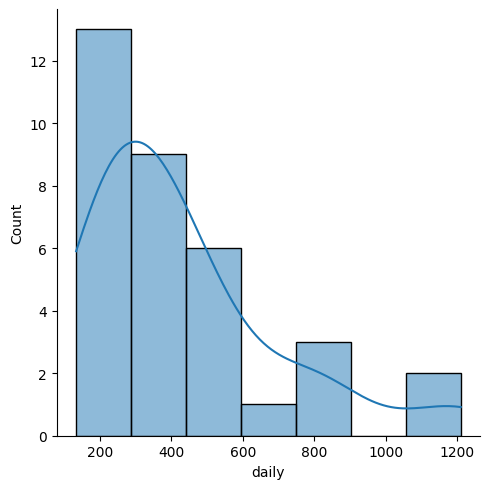

In [98]:
sns.displot(data.daily,kde=True)

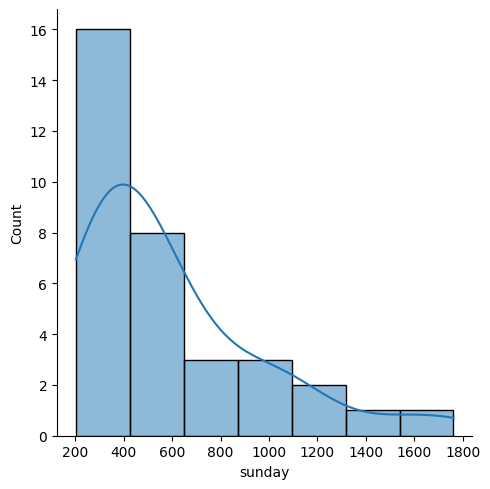

In [99]:
sns.displot(data.sunday,kde=True)

In [100]:
import statsmodels.formula.api as smf
datam=smf.ols("sunday~daily",data=data).fit()

In [101]:
datam.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           6.02e-19
Time:                        14:06:12   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
datam.params

Intercept    13.835630
daily         1.339715
dtype: float64

<Axes: xlabel='daily', ylabel='sunday'>

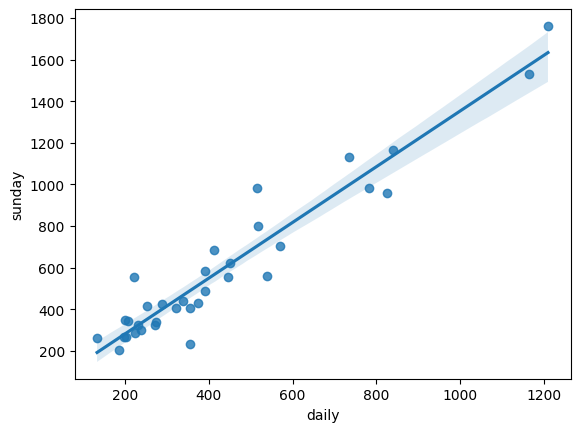

In [103]:
sns.regplot(x="daily",y="sunday",data=data)

In [104]:
#1000
13.83+(1.33*1000)

1343.83

In [105]:
#for 200 and 600
newf=pd.Series([200,500])
newf_pred=pd.DataFrame(newf,columns=["daily"])
newf_pred

,daily
0,200
1,500


In [106]:
datam.predict(newf_pred)

0    281.778581
1    683.693009
dtype: float64

In [107]:
ve=pd.Series([500,700,900])
ve_pred=pd.DataFrame(ve,columns=["daily"])
ve_pred

,daily
0,500
1,700
2,900


In [108]:
datam.predict(ve_pred)

0     683.693009
1     951.635960
2    1219.578912
dtype: float64

In [109]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error

In [110]:
pred=datam.predict(data.daily)
pred

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

In [111]:
mean_absolute_percentage_error(data["daily"],pred)

0.3827111928552968

In [112]:
mean_squared_error(data.daily,pred)

33794.87469205262

In [114]:
rmse=np.sqrt(mean_squared_error(data.daily,pred))
rmse

183.83382358002734